<a href="https://colab.research.google.com/github/sachin00028/Polynomial/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/polynomial.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [ ]:
df1=df.drop(['sno'],axis=1)
df1

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [ ]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
y

array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01])

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0, 0.5, 'Pressure')

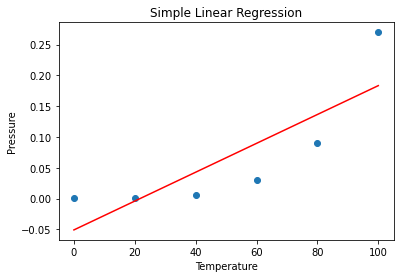

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('Error is',mean_absolute_percentage_error(y,y_pred))

Error is 44.775078189300416


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [ ]:
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)
y_poly=lin2.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

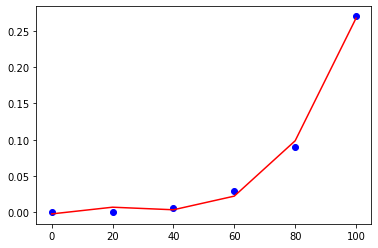

In [ ]:
plt.scatter(x,y,color='b')
plt.plot(x,y_poly,color='r')

In [ ]:
df2=pd.DataFrame({'Actual_value':y,'Predicted_simple':y_pred,'predicted_poly':y_poly})
df2

,Actual_value,Predicted_simple,predicted_poly
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [ ]:
from sklearn.metrics import r2_score
print('Polynomial R2 score',r2_score(y_poly,y)) 
print('Simple R2 score',r2_score(y,y_pred))

Polynomial R2 score 0.9966579933704296
Simple R2 score 0.690349972603981
